# Datrix Classification Assignment

In [166]:
!pip install seaborn
!pip install scikit-learn

In [167]:
import pandas as pd
import numpy as np
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pathlib import Path

# Pre Processing

In [168]:
data_path="https://raw.githubusercontent.com/anikdip/stds/main/TeleCom_Data-2.csv"
df=pd.read_csv(data_path,sep=";")

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [170]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41175,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41176,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41177,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41178,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [171]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9253
technician        6742
services          3967
management        2923
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24921
single      11568
divorced     4611
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12166
high.school             9513
basic.9y                6044
professional.course     5241
basic.4y                4175
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32581
unknown     8596
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21571
no         18619
unknown      

## Dealing with Missing Values

In [172]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [173]:
df.reset_index(inplace=True,drop=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
30477,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30478,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30479,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [174]:
df.default.value_counts()

no     30478
yes        3
Name: default, dtype: int64

In [175]:
df.drop("default",inplace=True,axis=1)

In [176]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## Exploratory Data Analysis and Pre-Processing

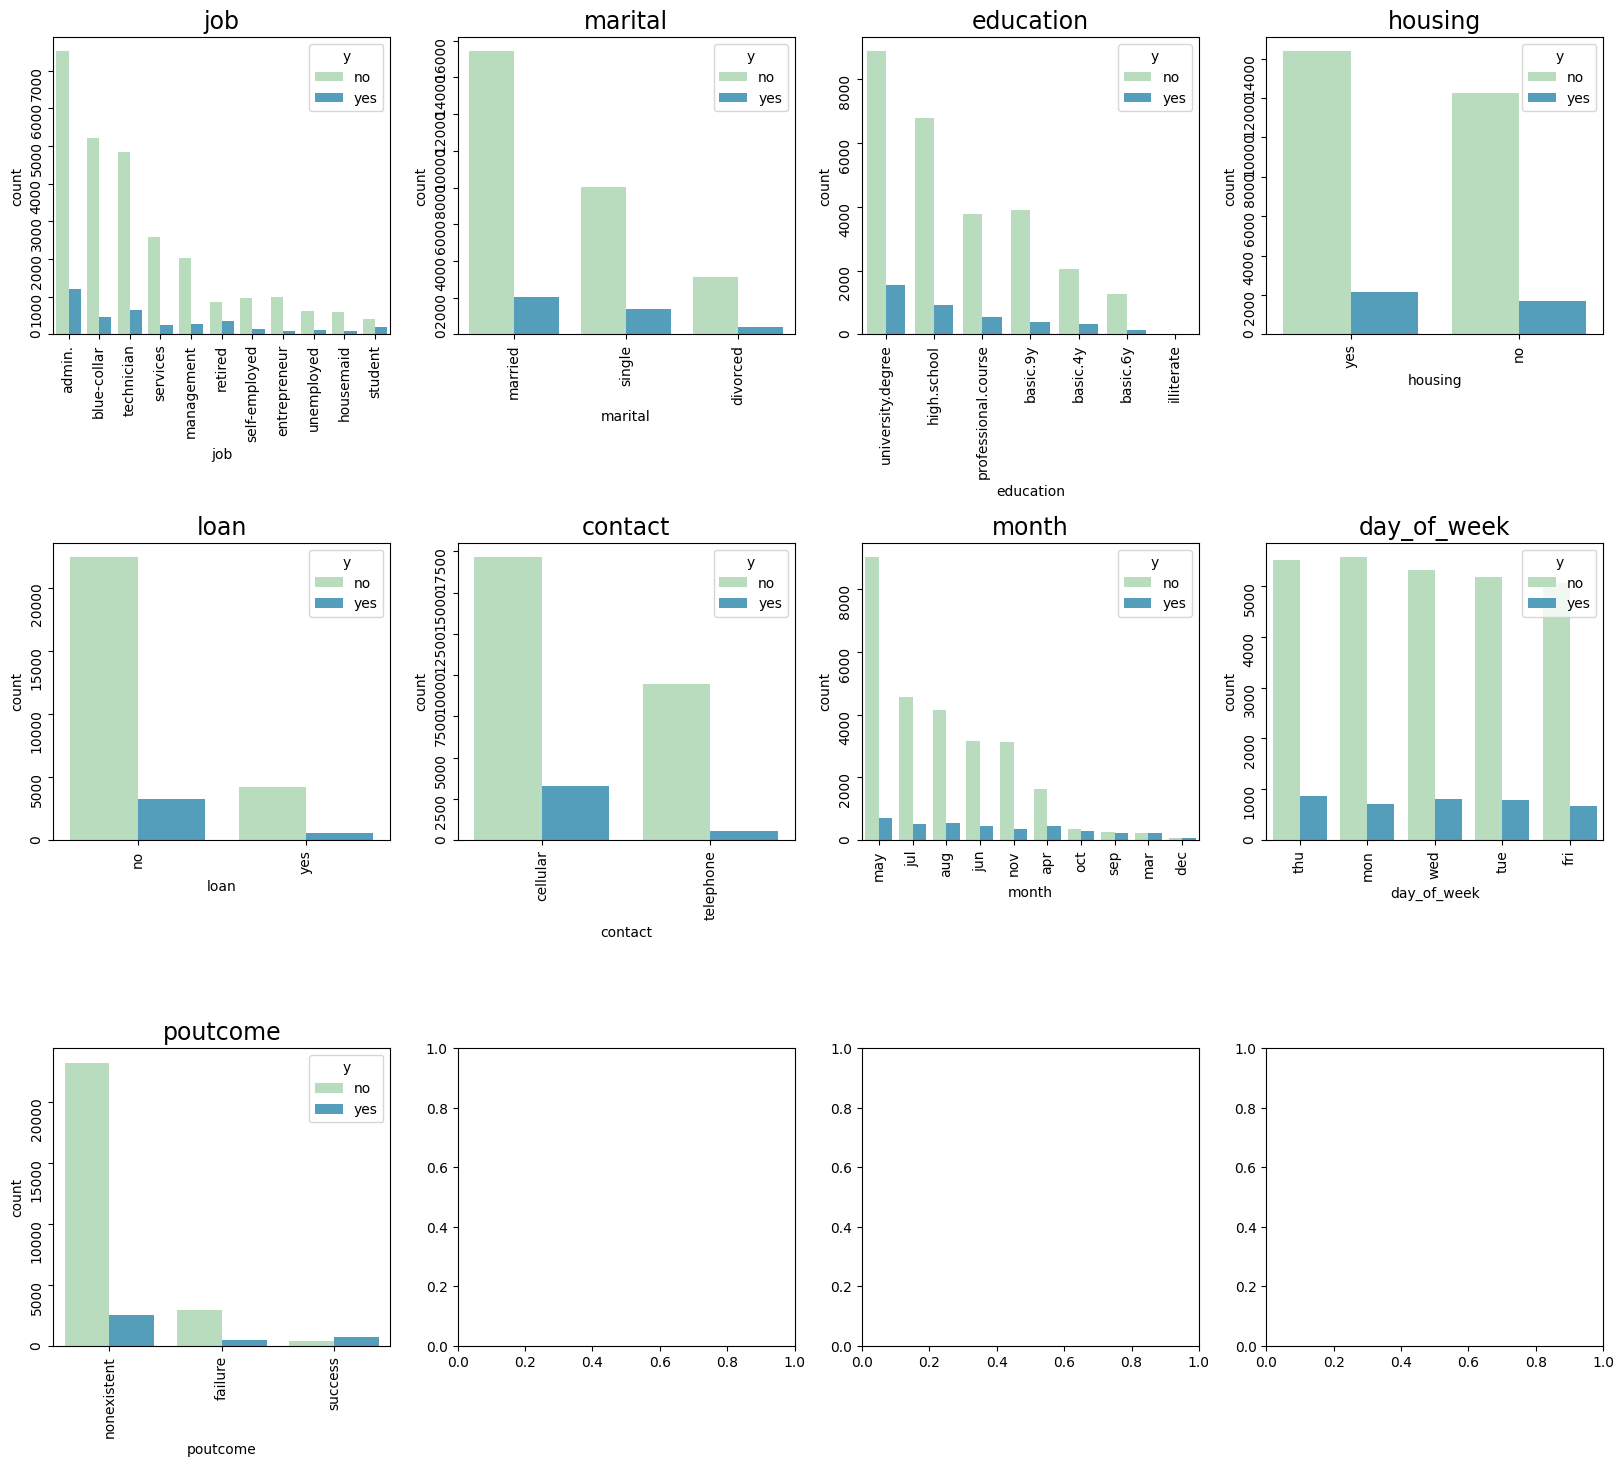

In [177]:
fig, ax = plt.subplots(3,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

In [178]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      10410
middle.school           8043
high.school             7698
professional.course     4319
illiterate                11
Name: education, dtype: int64

In [179]:
df.poutcome.value_counts()

nonexistent    25833
failure         3459
success         1189
Name: poutcome, dtype: int64

In [180]:
# binary if were was an outcome of marketing campane
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

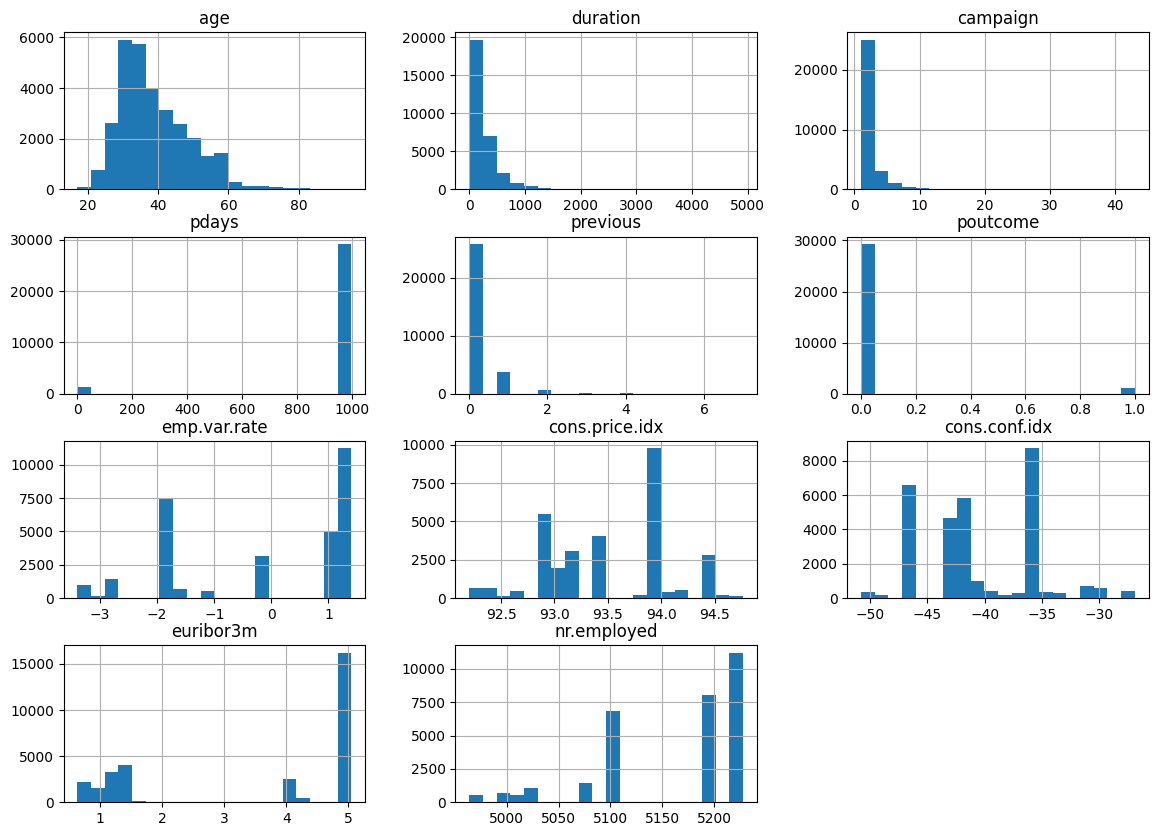

In [181]:
df.hist(bins=20, figsize=(14,10))
plt.show()

In [182]:
df.describe()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000,30481.000000
mean,39.027164,259.474591,2.521669,956.387815,0.193924,0.039008,-0.071490,93.523102,-40.601339,3.460119,5160.836318
std,10.331274,261.738980,2.720402,201.247710,0.521289,0.193617,1.610499,0.585249,4.788193,1.777163,75.132135
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [183]:
df.pdays.value_counts()

999    29173
3        381
6        362
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         20
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [184]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [185]:
df.pdays.value_counts()

0     29187
3       381
6       362
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        20
14       17
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64

In [186]:
df.previous.value_counts()

0    25833
1     3750
2      633
3      190
4       55
5       16
6        3
7        1
Name: previous, dtype: int64

In [187]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

C:\Users\Signature\AppData\Local\Temp\ipykernel_12860\55740520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)


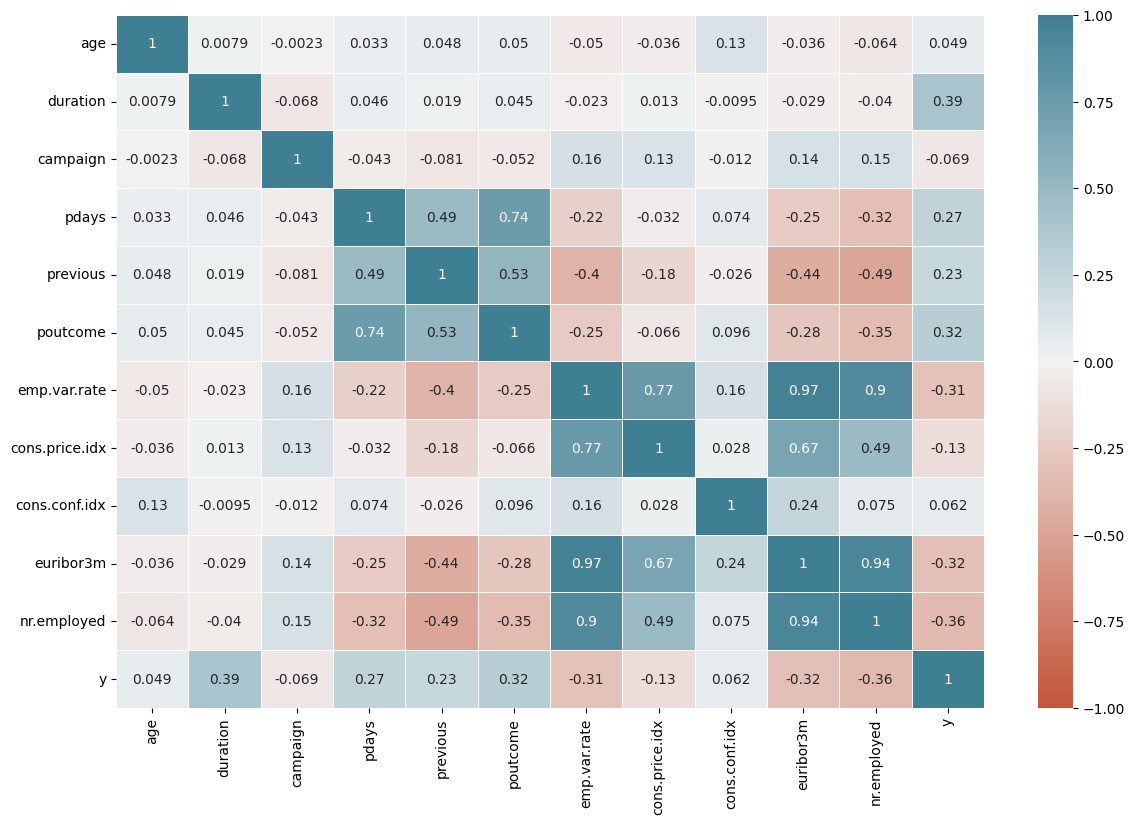

In [188]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

In [189]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') 

In [190]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,middle.school,no,no,telephone,may,mon,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,24,technician,single,professional.course,yes,no,telephone,may,mon,380,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,25,services,single,high.school,yes,no,telephone,may,mon,50,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


* Encoding the remaining features

In [191]:
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

In [192]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,0,1,2,0,0,1,6,1,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,56,7,1,0,0,1,1,6,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,59,0,1,3,0,0,1,6,1,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,24,9,2,3,1,0,1,6,1,380,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,25,7,2,0,1,0,1,6,1,50,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# Modelling

## Baseline Modelling without Feature Selection

In [193]:
!pip install xgboost

In [194]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, f1_score, recall_score
#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [195]:
X = df.iloc[:,df.columns != 'y']
y = df.y
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [196]:
#creating dictionary for storing different models accuracy
model_comparison={}

In [197]:
def ML_training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    log_lm = LogisticRegression()
    log_lm.fit(X_train, y_train)
    logy_pred = log_lm.predict(X_test)
    acclr = accuracy_score(y_test, logy_pred)*100
    crossvallr = cross_val_score(estimator = log_lm, X = X_train, y = y_train, cv = 5, scoring="recall")
    f1scrlr = f1_score(y_test, logy_pred,average='weighted')*100
    logquestions = pd.DataFrame({'features': X.columns,'Coef': (log_lm.coef_[0])*100})
    logquestions = logquestions.sort_values(by='Coef', ascending=False)
    model_comparison['Logistic Regression']=[acclr,f1scrlr,recall_score(y_test, logy_pred, average='weighted')*100,(crossvallr.mean())*100]
    ##############################
    dtree=DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dtreey_pred = dtree.predict(X_test)
    accdtree = accuracy_score(y_test, dtreey_pred)*100
    crossvaltree = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 5, scoring="recall")
    f1scrtree = f1_score(y_test, dtreey_pred,average='weighted')*100
    dtreequestions = importance(dtree,X)
    model_comparison['Decision Tree']=[accdtree,f1scrtree,recall_score(y_test, dtreey_pred, average='weighted')*100,(crossvaltree.mean())*100]
    ##############################
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rfy_pred = rf.predict(X_test)
    accrf = accuracy_score(y_test, rfy_pred)*100
    crossvalrf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
    f1scrrf = f1_score(y_test, rfy_pred,average='weighted')*100
    accquestions = importance(rf,X)
    model_comparison['Random Forest']=[accrf,f1scrrf,recall_score(y_test, rfy_pred, average='weighted')*100,(crossvalrf.mean())*100]
    #############################
    gbrt = GradientBoostingClassifier(random_state=42)
    gbrt.fit(X_train, y_train)
    gbrt_pred=gbrt.predict(X_test)
    accgbgb = accuracy_score(y_test, gbrt_pred)*100
    crossvalgb = cross_val_score(estimator = gbrt, X = X_train, y = y_train, cv = 5)
    f1scrgb = f1_score(y_test, gbrt_pred,average='weighted')*100
    gbrtaccquestions = importance(gbrt,X)
    model_comparison['Gradient Boosting']=[accgbgb,f1scrgb,recall_score(y_test, gbrt_pred, average='weighted')*100,(crossvalgb.mean())*100]
    #############################
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred=knn.predict(X_test)
    knngbrt = accuracy_score(y_test, knn_pred)*100
    crossvalknn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)
    f1scrknn = f1_score(y_test, knn_pred,average='weighted')*100
    #knnaccquestions = importance(knn,X)
    model_comparison['Gradient Boosting']=[knngbrt,f1scrknn,recall_score(y_test, knn_pred, average='weighted')*100,(crossvalknn.mean())*100]
    #############################
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    xgb_pred=xgb.predict(X_test)
    xgbgbrt = accuracy_score(y_test, xgb_pred)*100
    crossvalxgb = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 5)
    f1scrxgb = f1_score(y_test, xgb_pred,average='weighted')*100
    xgbtaccquestions = importance(xgb,X)
    model_comparison['Xg Boost']=[xgbgbrt,f1scrxgb,recall_score(y_test, xgb_pred, average='weighted')*100,(crossvalxgb.mean())*100]

    # Reporting
    print("Logistic Regression Report in test set")
    print(classification_report(y_test, logy_pred))
    print(confusion_matrix(y_test,logy_pred))
    print(logquestions)
    print("------------------------------------------------------")
    print("Decision Tree Report in test set")
    print(classification_report(y_test, dtreey_pred))
    print(confusion_matrix(y_test,dtreey_pred))
    print(dtreequestions)
    print("------------------------------------------------------")
    print("Random Forest Report in test set")
    print(classification_report(y_test, rfy_pred))
    print(confusion_matrix(y_test,rfy_pred))
    print(accquestions)
    print("------------------------------------------------------")
    print("Gradient Boosting in test set")
    print(classification_report(y_test, gbrt_pred))
    print(confusion_matrix(y_test,gbrt_pred))
    print(gbrtaccquestions)
    print("------------------------------------------------------")
    print("K Neighbors in test set")
    print(classification_report(y_test, knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    #print(knnaccquestions)
    print("------------------------------------------------------")
    print("Xg Boost in test set")
    print(classification_report(y_test, xgb_pred))
    print(confusion_matrix(y_test,xgb_pred))
    print(xgbtaccquestions)
    print("------------------------------------------------------")

In [198]:
def importance(model,X):
    questions = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    questions.sort_values(by='importance', ascending=False)
    questions = questions.sort_values(by='importance', ascending=False)
    return questions

In [199]:
ML_training(X,y)

C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5353
           1       0.63      0.35      0.45       744

    accuracy                           0.90      6097
   macro avg       0.77      0.66      0.70      6097
weighted avg       0.88      0.90      0.88      6097

[[5200  153]
 [ 483  261]]
          features       Coef
15  cons.price.idx  26.626294
11           pdays  16.258717
3        education   6.938170
13        poutcome   5.637518
8      day_of_week   4.885796
16   cons.conf.idx   4.316718
2          marital   4.145722
1              job   2.627051
12        previous   1.815728
9         duration   0.448514
4          housing   0.231096
0              age   0.223565
5             loan  -0.147389
18     nr.employed  -0.507518
10        campaign  -5.272108
6          contact  -5.648285
7            month -10.149184
14    emp.var.rate -25.032047
17       euribor3m -26.331825
-------

In [200]:
def model_compare():
    Model_com_df=pd.DataFrame(model_comparison).T
    Model_com_df.columns=['Model Accuracy','Model F1-Score','Recall','CV Accuracy']
    Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
    # Model_com_df.style.format("{:.2f}%").background_gradient(cmap='Blues')
    return Model_com_df

In [201]:
model_compare().style.format("{:.2f}%").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,Recall,CV Accuracy
Random Forest,90.86%,90.54%,90.86%,90.35%
Xg Boost,90.55%,90.38%,90.55%,90.25%
Gradient Boosting,89.19%,88.86%,89.19%,88.66%
Logistic Regression,89.57%,88.24%,89.57%,35.40%
Decision Tree,87.57%,87.81%,87.57%,52.62%


## Balanced Dataset without Feature Selection

In [202]:
print("Unbalanced Data shape", len(df))
datano = df[df.y == 0]
datayes = df[df.y == 1]
balanced_df = pd.concat([datano.sample(len(datayes), random_state=5), datayes])
print("Balanced data shape:", len(balanced_df))

Unbalanced Data shape 30481
Balanced data shape: 7714


In [203]:
balanced_df.y.value_counts()

0    3857
1    3857
Name: y, dtype: int64

In [204]:
balanced_df.reset_index(inplace=True,drop=True)

In [205]:
X_balanced = balanced_df.iloc[:,balanced_df.columns != 'y']
y_balanced = balanced_df.y
print("X Columns: ",list(X_balanced.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [206]:
ML_training(X_balanced,y_balanced)

C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       773
           1       0.83      0.86      0.84       770

    accuracy                           0.84      1543
   macro avg       0.84      0.84      0.84      1543
weighted avg       0.84      0.84      0.84      1543

[[638 135]
 [109 661]]
          features       Coef
15  cons.price.idx  28.364656
11           pdays  17.957954
3        education   9.784112
16   cons.conf.idx   5.056033
13        poutcome   4.855517
8      day_of_week   4.806599
2          marital   4.409998
1              job   3.086354
12        previous   1.772999
4          housing   0.704540
9         duration   0.648259
0              age   0.245266
5             loan  -0.447339
18     nr.employed  -0.509423
6          contact  -5.315780
10        campaign  -5.427324
7            month -11.150679
17       euribor3m -33.201215
14    emp.var.rate -33.749948
-----------

In [207]:
model_compare().style.format("{:.2f}%").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,Recall,CV Accuracy
Random Forest,88.59%,88.58%,88.59%,88.25%
Xg Boost,88.14%,88.13%,88.14%,88.27%
Gradient Boosting,84.83%,84.83%,84.83%,84.70%
Logistic Regression,84.19%,84.18%,84.19%,85.55%
Decision Tree,83.80%,83.80%,83.80%,83.15%


## Balanced Data with Some Feature Scaling

In [208]:
# change the range of Var Rate
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'] * -1
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

# Multiply consumer index 
balanced_df['cons.price.idx'] = (balanced_df['cons.price.idx'] * 10).astype('uint8')

# change the sign (we want all be positive values)
balanced_df['cons.conf.idx'] = balanced_df['cons.conf.idx'] * -1

# re-scale variables
balanced_df['nr.employed'] = np.log2(balanced_df['nr.employed']).astype('uint8')
balanced_df['cons.price.idx'] = np.log2(balanced_df['cons.price.idx']).astype('uint8')
balanced_df['cons.conf.idx'] = np.log2(balanced_df['cons.conf.idx']).astype('uint8')

In [209]:
X_balanced_scaled = balanced_df.iloc[:,balanced_df.columns != 'y']
y_balanced_scaled = balanced_df.y
print("X Columns: ",list(X_balanced_scaled.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [210]:
ML_training(X_balanced_scaled,y_balanced_scaled)

C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       773
           1       0.82      0.86      0.84       770

    accuracy                           0.84      1543
   macro avg       0.84      0.84      0.84      1543
weighted avg       0.84      0.84      0.84      1543

[[627 146]
 [105 665]]
          features       Coef
2          marital  25.170050
13        poutcome  23.849539
11           pdays  18.971564
3        education  11.082208
8      day_of_week   8.650417
18     nr.employed   5.858336
14    emp.var.rate   4.008692
15  cons.price.idx   3.417363
1              job   3.051828
0              age   1.169450
9         duration   0.654288
6          contact  -0.207767
4          housing  -3.518003
5             loan  -4.363876
10        campaign  -4.991033
7            month  -5.966539
12        previous -10.961508
16   cons.conf.idx -42.994660
17       euribor3m -83.582334
-----------

In [211]:
model_compare().style.format("{:.2f}%").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,Recall,CV Accuracy
Xg Boost,88.27%,88.26%,88.27%,87.77%
Random Forest,88.08%,88.07%,88.08%,88.19%
Logistic Regression,83.73%,83.72%,83.73%,85.78%
Decision Tree,83.08%,83.08%,83.08%,81.76%
Gradient Boosting,80.36%,80.36%,80.36%,80.15%



* Scaled dataset does not improved the score. 
* Random Forest Classifer perform best so for. Let's build a model for Random Forest with some hyperparameters.

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size = 0.20, random_state = 0)

In [213]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [214]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = 4)
xgb_Grid = GridSearchCV(estimator = xgb, param_grid = random_grid, cv = 3, verbose=2, n_jobs = 4)

In [215]:
rf_Grid.fit(X_train, y_train)
xgb_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\Signature\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:15:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=4,
             param_grid={'max_depth': [1, 23, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 65, 110, 155, 200]},
             verbose=2)

In [216]:
rf_Grid.best_params_
xgb_Grid.best_params_

{'max_depth': 23,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 20}

In [217]:
rf = RandomForestClassifier(n_estimators=155,max_depth=45, max_features=0.25, min_samples_split=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))


Accuracy of Random Forest classifier on test set: 0.88


Confusion Matrix:
 [[657 116]
 [ 63 707]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       773
           1       0.86      0.92      0.89       770

    accuracy                           0.88      1543
   macro avg       0.89      0.88      0.88      1543
weighted avg       0.89      0.88      0.88      1543



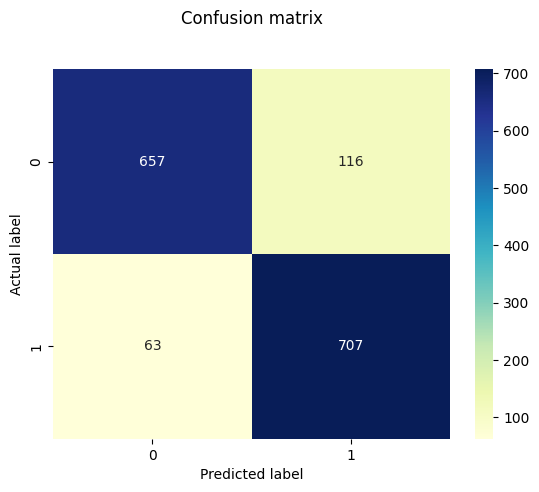

In [218]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

In [219]:
xgb = XGBClassifier(n_estimators=155,max_depth=45)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy of Xg Boost classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))

Accuracy of Xg Boost classifier on test set: 0.88


Confusion Matrix:
 [[666 107]
 [ 79 691]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       773
           1       0.87      0.90      0.88       770

    accuracy                           0.88      1543
   macro avg       0.88      0.88      0.88      1543
weighted avg       0.88      0.88      0.88      1543



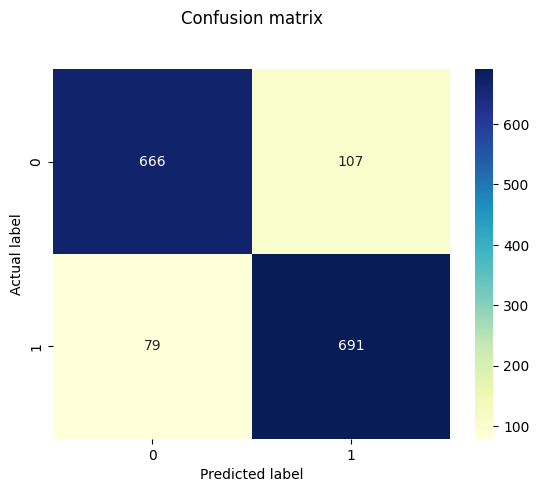

In [220]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

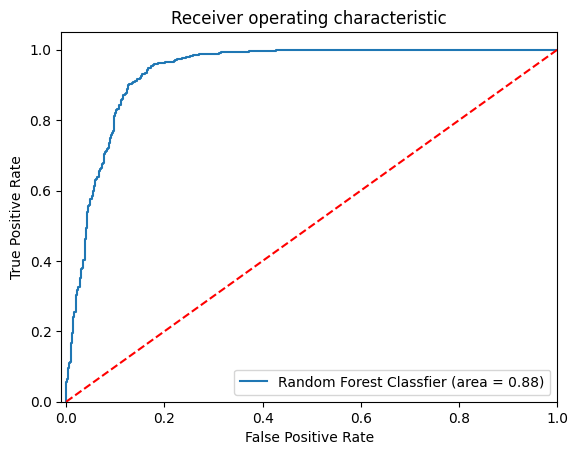

In [221]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classfier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

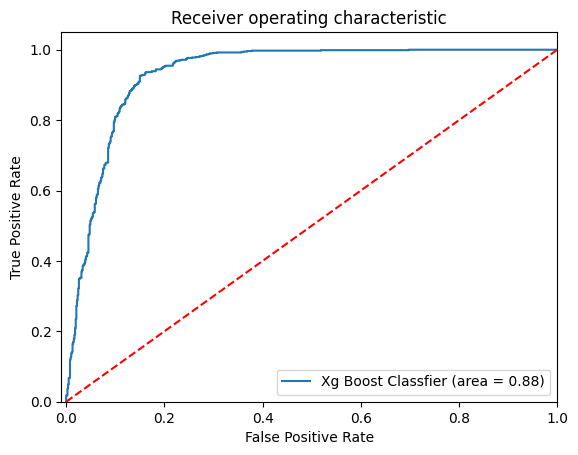

In [222]:
logit_roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Xg Boost Classfier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Feature importance with LOFO (Leave One Feature Out)

In [223]:
!pip install lofo-importance

In [224]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 17
[LightGBM] [Info] [binary:Bo

  0%|          | 0/19 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

  5%|▌         | 1/19 [00:00<00:08,  2.23it/s]

[LightGBM] [Info] Number of positive: 2898, number of negative: 2888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 5786, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500864 -> initscore=0.003457
[LightGBM] [Info] Start training from score 0.003457
[LightGBM] [Info] Number of positive: 2878, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 5786, number of used features: 16
[LightGBM] [Info] [binary:Bo

 11%|█         | 2/19 [00:00<00:07,  2.25it/s]

[LightGBM] [Info] Number of positive: 2898, number of negative: 2888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 5786, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500864 -> initscore=0.003457
[LightGBM] [Info] Start training from score 0.003457
[LightGBM] [Info] Number of positive: 2878, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 5786, number of used features: 16
[LightGBM] [Info] [binary:Bo

 16%|█▌        | 3/19 [00:01<00:06,  2.30it/s]

[LightGBM] [Info] Number of positive: 2898, number of negative: 2888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 5786, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500864 -> initscore=0.003457
[LightGBM] [Info] Start training from score 0.003457
[LightGBM] [Info] Number of positive: 2878, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5786, number of used features: 16
[LightGBM] [Info] [binary:Bo

 21%|██        | 4/19 [00:01<00:06,  2.32it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501642 -> initscore=0.006569
[LightGBM] [I

 26%|██▋       | 5/19 [00:02<00:06,  2.19it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 32%|███▏      | 6/19 [00:02<00:06,  2.09it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 37%|███▋      | 7/19 [00:03<00:06,  1.93it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 42%|████▏     | 8/19 [00:03<00:05,  1.88it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 47%|████▋     | 9/19 [00:04<00:05,  1.83it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 53%|█████▎    | 10/19 [00:05<00:05,  1.76it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 58%|█████▊    | 11/19 [00:05<00:04,  1.82it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 63%|██████▎   | 12/19 [00:06<00:03,  1.87it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 68%|██████▊   | 13/19 [00:06<00:03,  1.90it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 74%|███████▎  | 14/19 [00:07<00:02,  1.88it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 79%|███████▉  | 15/19 [00:07<00:02,  1.91it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 84%|████████▍ | 16/19 [00:08<00:01,  1.86it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 17
[LightGBM] [Info] [binary:Bo

 89%|████████▉ | 17/19 [00:08<00:01,  1.86it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 16
[LightGBM] [Info] [binary:Bo

 95%|█████████▍| 18/19 [00:09<00:00,  1.82it/s]

[LightGBM] [Info] Number of positive: 2893, number of negative: 2892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500086 -> initscore=0.000346
[LightGBM] [Info] Start training from score 0.000346
[LightGBM] [Info] Number of positive: 2902, number of negative: 2883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5785, number of used features: 17
[LightGBM] [Info] [binary:Bo

100%|██████████| 19/19 [00:09<00:00,  1.91it/s]


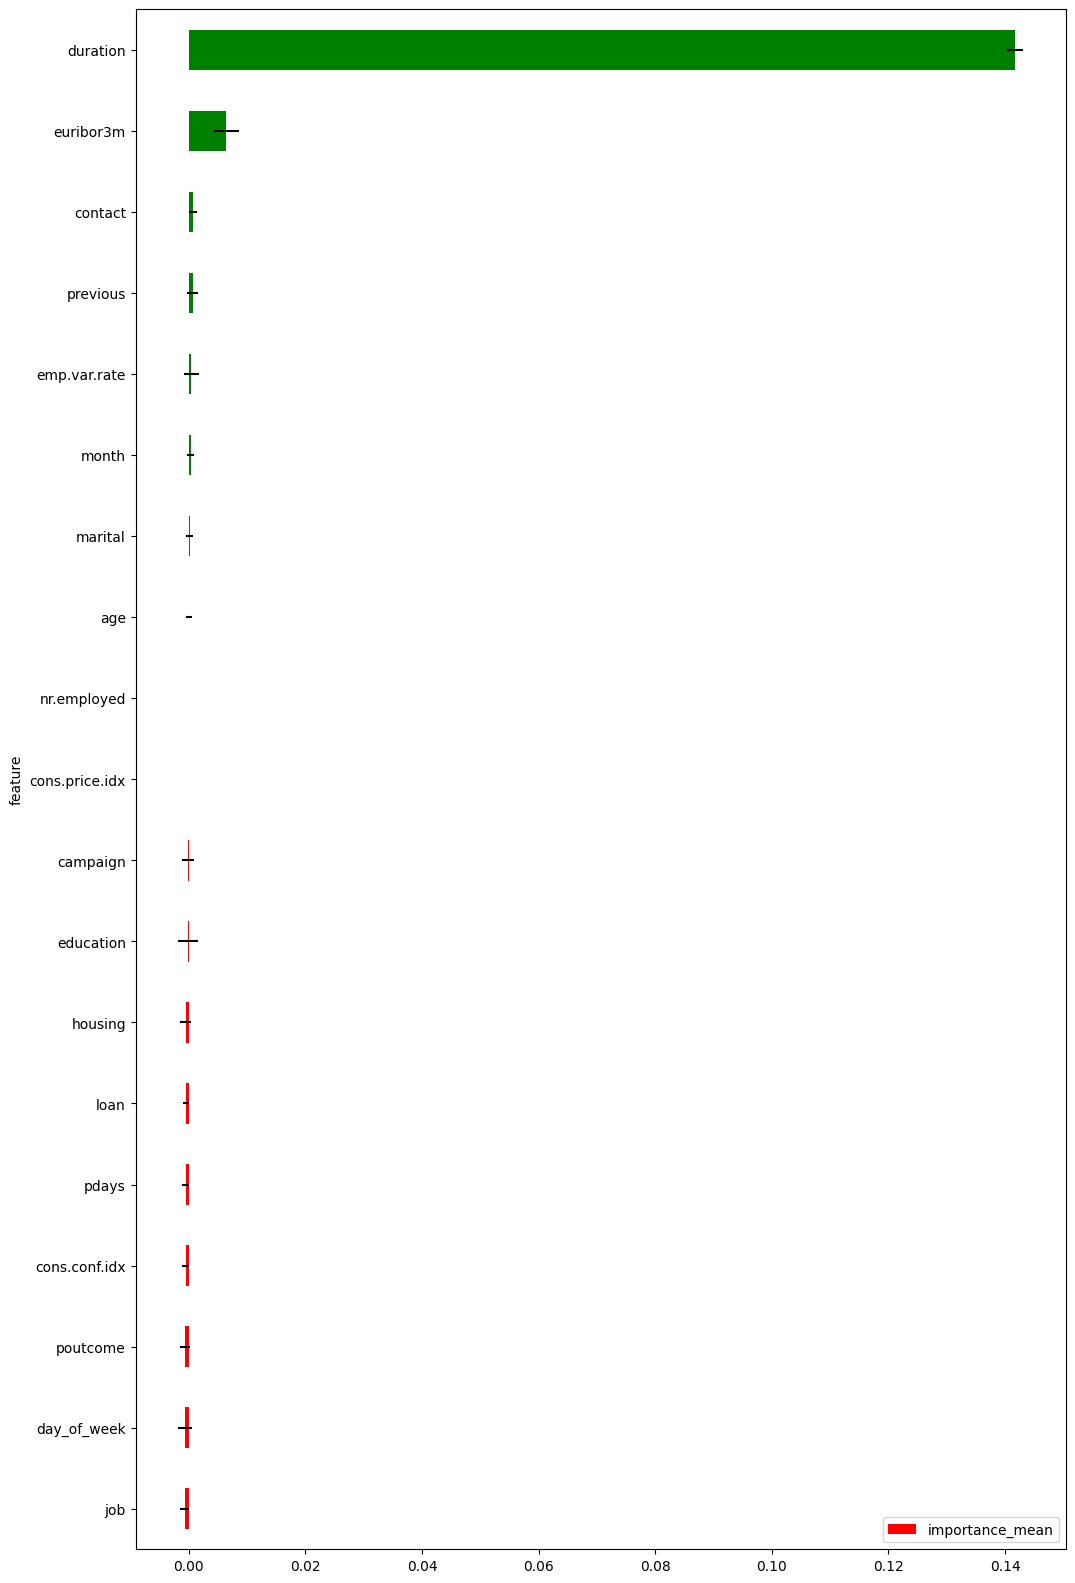

In [225]:

cv = KFold(n_splits=4, shuffle=True, random_state=0)

# define the binary target and the features
dataset = Dataset(df=balanced_df, target="y", features=[col for col in balanced_df.columns if col != "y"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))